## Load the data

In [8]:
## importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Andrew Data/heart-disease.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.shape

(303, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# checkpoint 
df = data.copy()


## Exploratory Data Analysis

In [13]:
df.target.isna().sum()

0

In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

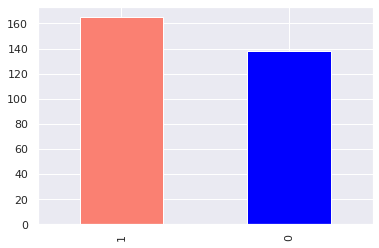

In [15]:
df.target.value_counts().plot(kind='bar',color=(['salmon','blue']));
# Target dataset are balanced 

## Heart disease frequency according to sex

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
## Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


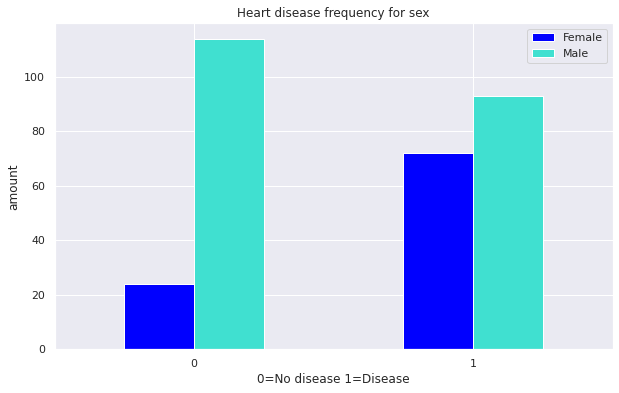

In [18]:
## create a plot of comparasion of target and sex columns 
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=(['blue','turquoise']));
plt.title('Heart disease frequency for sex')
plt.xlabel('0=No disease 1=Disease')
plt.ylabel('amount')
plt.legend(['Female','Male'])

plt.xticks(rotation=0);


## Age vs. Max heart rate for heart disease

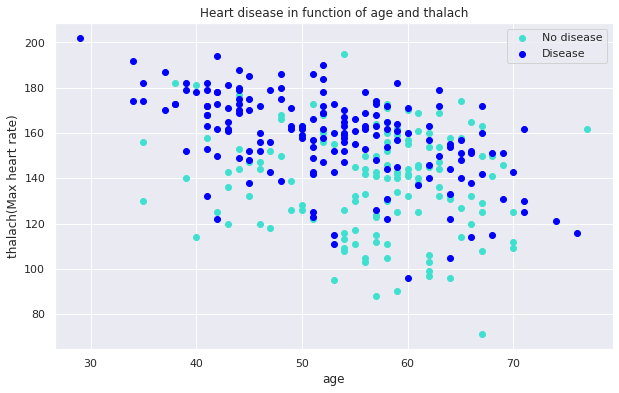

In [19]:
# create a plot 
# scatter with negative examples
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c=('turquoise'));
  
# scatter with postive examples

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c=('blue'));

# add some info
plt.title('Heart disease in function of age and thalach')
plt.xlabel('age')
plt.ylabel('thalach(Max heart rate)')
plt.legend(['No disease','Disease']);
  


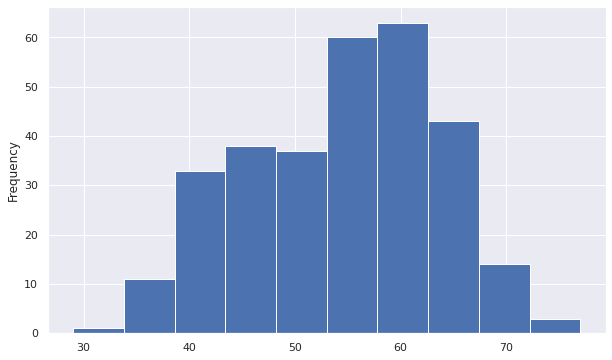

In [20]:
# age distribution
df.age.plot.hist(figsize=(10,6));

In [21]:
# fig , ax = plt.subplots()
# ax.scatter(df.age,df.target)
# ax.legend();



## Heart disease frequency per chest pain type

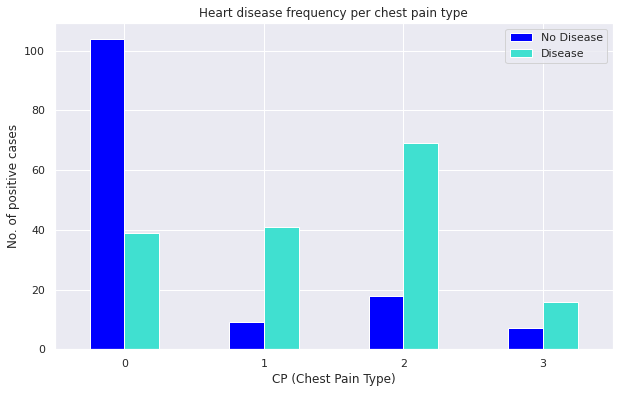

In [22]:
pd.crosstab(df.cp,df.target).plot(kind='bar', color=(['blue','turquoise']),figsize=(10,6));
plt.ylabel('No. of positive cases')
plt.title("Heart disease frequency per chest pain type")
plt.xlabel('CP (Chest Pain Type)')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

## Creating a correlation Matrix

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


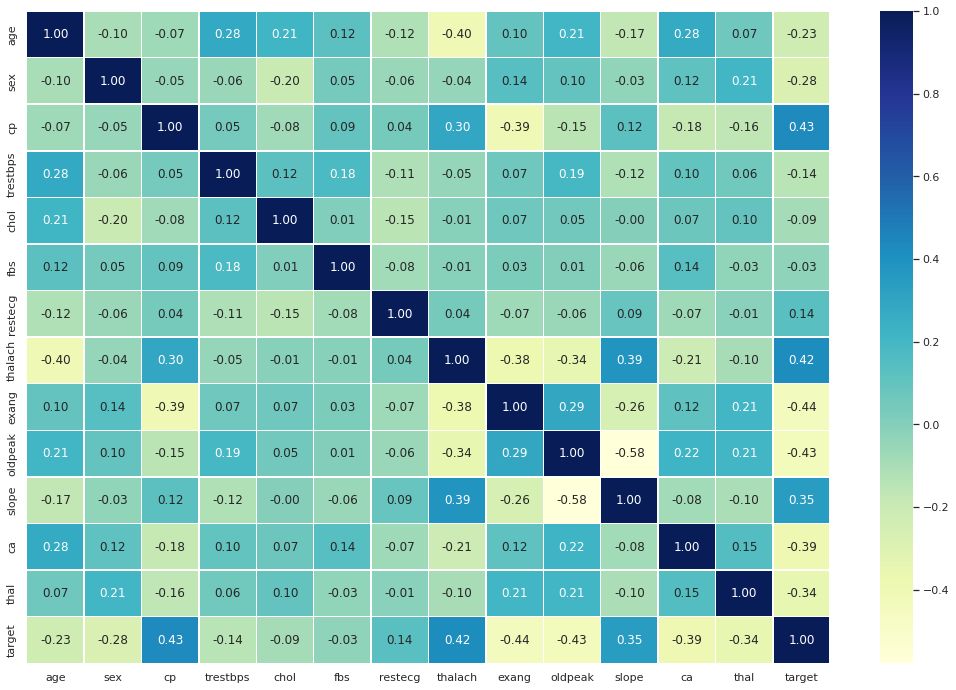

In [24]:
## creating heatmap of correlation matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu',
                 )


## Machine Learning Part

**Getting Our Data Ready**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Getting our inputs and outputs ready

x = df.drop('target',axis = 1)
y = df['target']

In [27]:
x.shape, y.shape

((303, 13), (303,))

In [28]:
# split the data into train and test sets
np.random.seed(42)

x_train , x_test , y_train , y_test = train_test_split(x,
                                                       y,
                                                       train_size = 0.2)

In [29]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60, 13), (60,), (243, 13), (243,))

## Modelling

We'll try 3 different models

1.   Logistic Regression
2.   KNN Classifier
3.   Random Forest Classifier











In [30]:
# putting the model in a dictionary
models = {'LogisiticRegression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier()}

# a function to fit and score models 

def fit_and_score(models,x_train,x_test,y_train,y_test):
  # set up random seed
  np.random.seed(42)
  model_scores = {}
  # loop through the dictionary
  for name , model in models.items():
    # fit the model to the data
    model.fit(x_train,y_train)
    # Evalute the model and append its score to model_scores
    model_scores[name] = model.score(x_test,y_test)
  return model_scores



In [31]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.6707818930041153,
 'LogisiticRegression': 0.7901234567901234,
 'RandomForest': 0.8189300411522634}

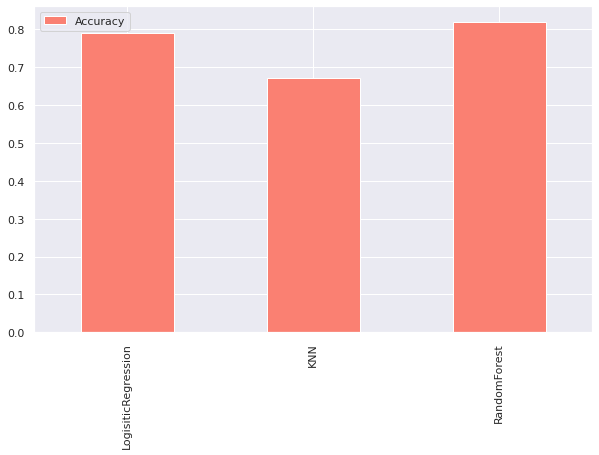

In [32]:
models_compare = pd.DataFrame(model_scores,index =['Accuracy'])
models_compare.T.plot.bar(figsize=(10,6),color=(['salmon'])) ;

## Hyper parameter tunning 

Max KNN score on the test data 69.14%


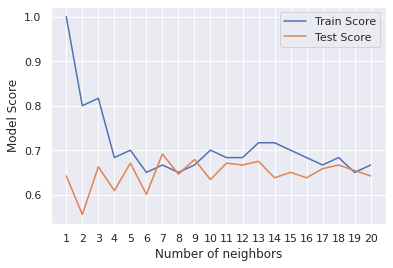

In [33]:
# let's tune KNN 
train_score = []
test_score = []
# create a different values of n neighbors
neighbors = range(1,21)
KNN = KNeighborsClassifier()

# loop through n_neighbors 
for i in neighbors:
  KNN.set_params(n_neighbors=i)

  # fit the algorithm
  KNN.fit(x_train,y_train)

  # update the training score list
  train_score.append(KNN.score(x_train,y_train))

  # update the test score list
  test_score.append(KNN.score(x_test,y_test))

# plot train_score and test_score 
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,21))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();
  
print(f'Max KNN score on the test data {max(test_score)*100:.2f}%')

## Hyperparameter tunning with RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
# create a hyperparameter grid for logistic Regression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver': ['liblinear']} 

# create a hyperparameter grid for RandomForest Classifier 
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}



In [35]:
# tune logistic Regression 
# set up randomseed
np.random.seed(42)

# setup hyperparametes for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter = 20,
                                verbose=2,
                                cv=5)
# fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(x_train,y_train)
                                

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [36]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [37]:
rs_log_reg.score(x_test,y_test)

0.7942386831275721

In [38]:
# let's tune RandomForest
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               n_iter=20,
                               cv=5,
                               verbose=2)
# fit the random hyperparameter search model to the RandomForestClassifier
rs_rf_clf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.9s
[CV] END max_depth=1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [39]:
rs_rf_clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 60}

In [40]:
rs_rf_clf.score(x_test,y_test)

0.8395061728395061

## Tunning hyperparameter with GridSearchCV

In [41]:
# from sklearn.model_selection import GridSearchCV
# # setup random seed
# np.random.seed(42)
# rf_grid_new = {'n_estimators':np.arange(10,1000,50),
#            'max_depth':[None]
#            }
# # Applying GridSearchCv
# gs_rf_clf = GridSearchCV(RandomForestClassifier(),
#                          param_grid=rf_grid_new,
#                          cv=5,
#                          verbose=2)
# # fit the model to the search random hyperparameter to the RandomForestClasifier
# gs_rf_clf.fit(x_train,y_train)

In [42]:
# gs_rf_clf.best_params_

In [43]:
# gs_rf_clf.score(x_test,y_test)

## Classification reports of each models

In [44]:
# classification report of LogisticRegression Model
from sklearn.metrics import classification_report
# output prediction
# models = [LogisticRegression()]
# def predict_proba_(model,x_test,x_train,y_train):
#   y_preds = []
#   for model in models:
#     #fit the model
#     model.fit(x_train,y_train)
#     #predict the output and append in y_preds
#     y_preds.append(model.predict_proba(x_test))
#   return y_preds

# y_predicted=predict_proba_(models,
#               x_test=x_test,
#               x_train=x_train,
#               y_train=y_train)
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_preds = clf.predict(x_test)



reports = classification_report(y_test,y_preds)
reports
# from pprint import pprint as pp


#report = pd.DataFrame(reports,index=(['Accuracy','Precison','Recall','f1'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


'              precision    recall  f1-score   support\n\n           0       0.81      0.70      0.75       109\n           1       0.78      0.87      0.82       134\n\n    accuracy                           0.79       243\n   macro avg       0.79      0.78      0.78       243\nweighted avg       0.79      0.79      0.79       243\n'

## Evaluation of the model

In [45]:
from sklearn.metrics import roc_curve , roc_auc_score , precision_score , f1_score , accuracy_score 

# make prediction with our model 
y_preds = rs_rf_clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


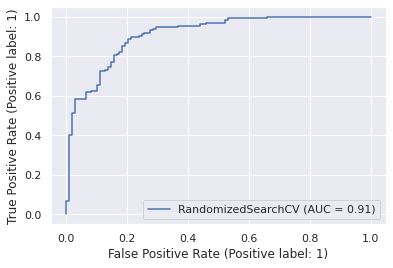

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rs_rf_clf,x_test,y_test);

In [47]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
def plot_conf_mat(y_true,y_preds):
  fig , ax = plt.subplots()
  ax = sns.heatmap(confusion_matrix(y_true,y_preds),
                   annot = True,
                   cbar = False)
  plt.xlabel('True label')
  plt.ylabel('False label')

                   

  

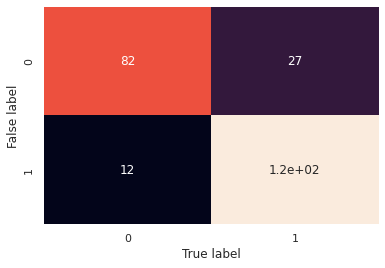

In [48]:
plot_conf_mat(y_test,y_preds)

In [49]:
82+27+12+1.2e+02

241.0

In [50]:
len(y_test),len(y_preds)

(243, 243)

## Calculate evalution matrix using Cross-validation

In [51]:
from sklearn.model_selection import cross_val_score 
clf = RandomForestClassifier(max_depth=None,
                             min_samples_leaf= 1,
                             min_samples_split= 18,
                            n_estimators= 60)
clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=18, n_estimators=60)

In [52]:
cv_score =np.mean( cross_val_score(clf,
                           x,
                           y,
                           scoring = 'accuracy',
                           cv=5))

In [53]:
cv_score

0.8216939890710384

In [54]:
cv_precision =np.mean( cross_val_score(clf,
                           x,
                           y,
                           scoring = 'precision',
                           cv=5))

In [55]:
cv_precision

0.8316745070065753

In [56]:
cv_f1 =np.mean( cross_val_score(clf,
                           x,
                           y,
                           scoring = 'f1',
                           cv=5))

In [57]:
cv_f1

0.8344757601976941

In [58]:
cv_recall = np.mean(cross_val_score(clf,
                           x,
                           y,
                           scoring = 'f1',
                           cv=5))

In [59]:
cv_recall

0.865974315539533

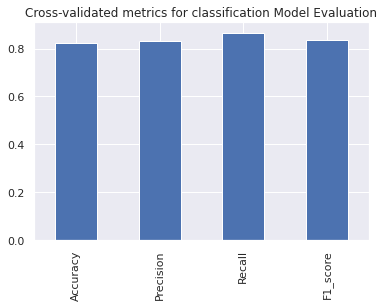

In [60]:
## visualize the validated metrics 
cv_metrics = pd.DataFrame({'Accuracy':cv_score,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1_score':cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title='Cross-validated metrics for classification Model Evaluation',legend=False);

## Feature selection

In [61]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf,prefit=True)

In [62]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

6

In [75]:
selected_feat

Index(['cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
# Feature_importance = pd.DataFrame({'cp':df['cp'],
#                                    'trestbps':df['trestbps'],
#                                    'thalach':df['thalach'],
#                                    'oldpeak':df['oldpeak'],
#                                    'ca':df['ca'],
#                                    'thal':df['thal']
#                                    },
#                                   index=[0] )


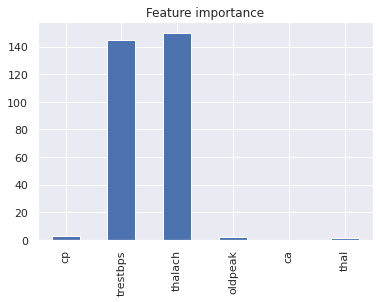

In [87]:
# Feature_importance.T.plot.bar(title='Feature importance',legend=False);